<a href="https://colab.research.google.com/github/mahalakruth/SAJRA/blob/main/Whisper_model28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("automatic-speech-recognition", model="openai/whisper-large-v3")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.27k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.09G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.90k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.07k [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


preprocessor_config.json:   0%|          | 0.00/340 [00:00<?, ?B/s]

In [2]:
audio_file_path = "/content/New_recording.mp3"

In [4]:
transcription_result =pipe(audio_file_path)
transcription_result

Due to a bug fix in https://github.com/huggingface/transformers/pull/28687 transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English.This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`.


{'text': " Good morning, I am Chadjyapiti. I am explaining whisper model. As of my last update in January 2022, there is not widely recognized concept or model known specifically as the whisper model in the fields of machine learning, artificial intelligence or related areas. It's possible that the TAM whisper model could refer to a new concept model or approach that has emerged after that time. But without further context or details, it's difficult to provide a specific explanation. if a whisper model refers to a specific concept or model in a particular domain such as natural language processing computer vision or another field i would need more information to provide a brief explanation if you have any additional context or details about the whisper model you are referring to please provide them and I can offer more assistance."}

In [5]:
transcribed_text = transcription_result['text']
transcribed_text

" Good morning, I am Chadjyapiti. I am explaining whisper model. As of my last update in January 2022, there is not widely recognized concept or model known specifically as the whisper model in the fields of machine learning, artificial intelligence or related areas. It's possible that the TAM whisper model could refer to a new concept model or approach that has emerged after that time. But without further context or details, it's difficult to provide a specific explanation. if a whisper model refers to a specific concept or model in a particular domain such as natural language processing computer vision or another field i would need more information to provide a brief explanation if you have any additional context or details about the whisper model you are referring to please provide them and I can offer more assistance."

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import librosa.display
import wave

In [7]:
import librosa
# Load audio file
audio_signal, sample_rate = librosa.load(audio_file_path, sr=None)


In [8]:
import soundfile as sf
# Load audio file
audio_signal,sample_rate = sf.read(audio_file_path)


In [9]:
# Get audio signal and sample rate
audio_signal, sample_rate = librosa.load(audio_file_path, sr=None)

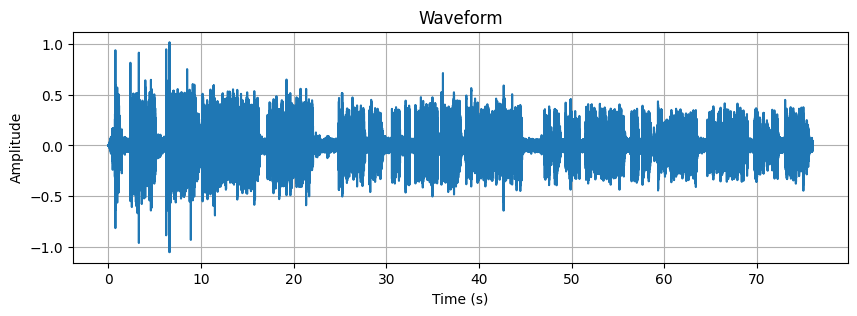

In [10]:
# Plot waveform
plt.figure(figsize=(10, 3))
plt.plot(np.linspace(0, len(audio_signal) / sample_rate, num=len(audio_signal)), audio_signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.grid()
plt.show()

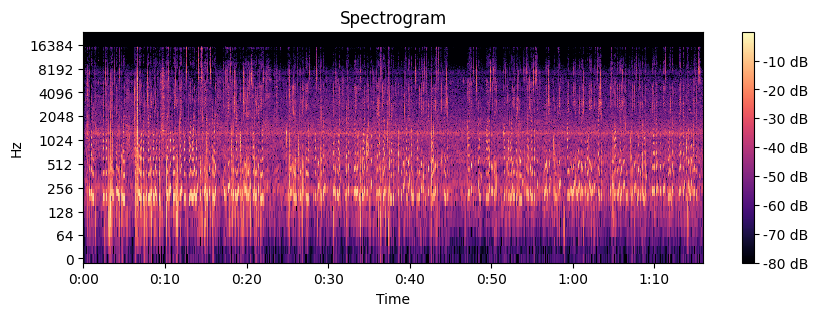

In [11]:
# Plot spectrogram
plt.figure(figsize=(10, 3))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(audio_signal)), ref=np.max), sr=sample_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

In [1]:
# Load model directly
from transformers import AutoProcessor, AutoModelForSpeechSeq2Seq

processor = AutoProcessor.from_pretrained("openai/whisper-large-v3")
model = AutoModelForSpeechSeq2Seq.from_pretrained("openai/whisper-large-v3")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [2]:
print(processor)

WhisperProcessor:
- feature_extractor: WhisperFeatureExtractor {
  "chunk_length": 30,
  "feature_extractor_type": "WhisperFeatureExtractor",
  "feature_size": 128,
  "hop_length": 160,
  "n_fft": 400,
  "n_samples": 480000,
  "nb_max_frames": 3000,
  "padding_side": "right",
  "padding_value": 0.0,
  "processor_class": "WhisperProcessor",
  "return_attention_mask": false,
  "sampling_rate": 16000
}

- tokenizer: WhisperTokenizer(name_or_path='openai/whisper-large-v3', vocab_size=50257, model_max_length=1000000000000000019884624838656, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>', 'pad_token': '<|endoftext|>', 'additional_special_tokens': ['<|startoftranscript|>', '<|en|>', '<|zh|>', '<|de|>', '<|es|>', '<|ru|>', '<|ko|>', '<|fr|>', '<|ja|>', '<|pt|>', '<|tr|>', '<|pl|>', '<|ca|>', '<|nl|>', '<|ar|>', '<|sv|>', '<|it|>', '<|id|>', '<|hi|>', '<|fi|>', '<|vi|>', '<|he

In [3]:
print(model)

WhisperForConditionalGeneration(
  (model): WhisperModel(
    (encoder): WhisperEncoder(
      (conv1): Conv1d(128, 1280, kernel_size=(3,), stride=(1,), padding=(1,))
      (conv2): Conv1d(1280, 1280, kernel_size=(3,), stride=(2,), padding=(1,))
      (embed_positions): Embedding(1500, 1280)
      (layers): ModuleList(
        (0-31): 32 x WhisperEncoderLayer(
          (self_attn): WhisperAttention(
            (k_proj): Linear(in_features=1280, out_features=1280, bias=False)
            (v_proj): Linear(in_features=1280, out_features=1280, bias=True)
            (q_proj): Linear(in_features=1280, out_features=1280, bias=True)
            (out_proj): Linear(in_features=1280, out_features=1280, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=1280, out_features=5120, bias=True)
          (fc2): Linear(in_features=5120, out_features=1280, bias=Tr